# Week 5: Digital Humanities 


In [2]:
import pandas as pd
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt
import scipy.special
import itertools
import re
from scipy.stats import binom
from collections import Counter

In [4]:
words_of_interest = ['upon', 'the', 'state', 'enough', 'while', 'any', 'his', 'were','to']
df = pd.read_csv('data/federalist-papersNew2.csv', index_col=0)
print("No. of articles: {}".format(len(df)))
df[words_of_interest].sample(6)

No. of articles: 85


,upon,the,state,enough,while,any,his,were,to
10,0,261,3,0,0,4,8,0,100
4,0,86,6,0,0,5,2,1,51
26,6,201,7,7,0,10,6,7,95
51,0,202,7,0,0,1,0,4,50
36,6,251,25,0,0,10,0,1,120
55,0,182,7,0,0,8,0,6,78


In [5]:
disputed_essays = df[df['AUTHOR'] == 'Hamilton OR Madison'].index
assert len(disputed_essays) == 12  
assert set(disputed_essays) == {49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63}

In [6]:
df_known = df.loc[df['AUTHOR'].isin(('Hamilton', 'Madison'))]
print(df_known['AUTHOR'].value_counts())

Hamilton    51
Madison     14
Name: AUTHOR, dtype: int64


#### Q1. Considering the words ‘to’, ‘upon’ and ‘would’, draw a graph representing the occurrences of those words in Hamilton and Madison’s articles.

#### Ans. Please find anaylsis below.

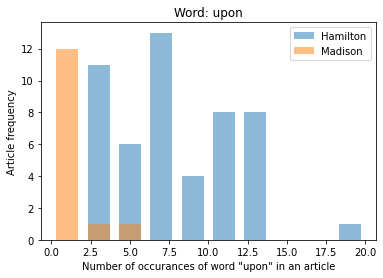

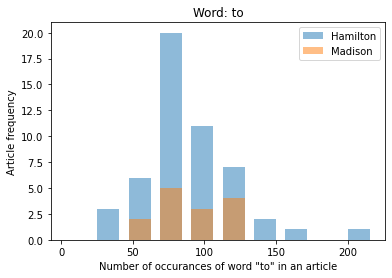

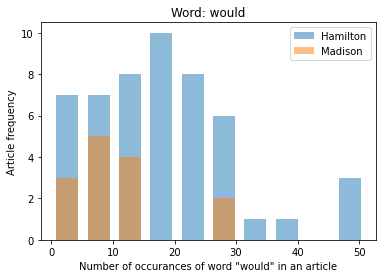

In [41]:
for word in ['upon','to','would']:
    
    maxwordcount = df_known[word].max()
    df_known.groupby('AUTHOR')[word].plot.hist(rwidth=0.7,alpha=0.5, range=(0, maxwordcount), legend=True)
    plt.title("Word: {}".format(word))
    plt.xlabel('Number of occurances of word "{}" in an article'.format(word))
    plt.ylabel('Article frequency')

    plt.show()


#### Q2. With these three words, model them as a binomial to reflect either occurrences in Hamilton or Madison’s writing style.

#### Binomial distribution for 3 words for Hamilton papers

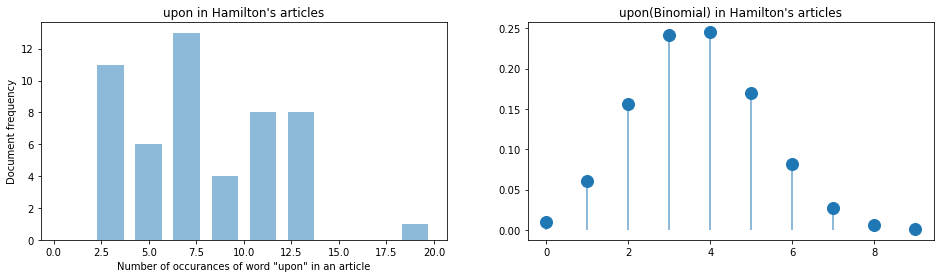

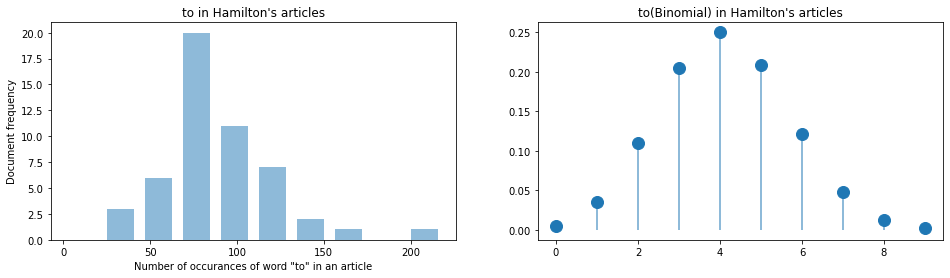

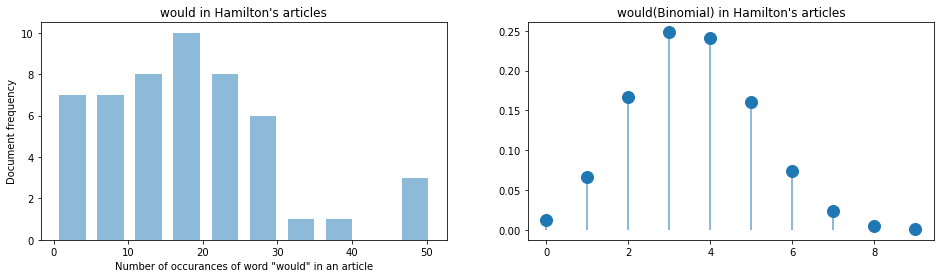

In [52]:
for word in ['upon','to', 'would']:
    
    maxwordcount = df_known[word].max()
    plt.figure(figsize=(16,4))
    plt.subplot(1, 2, 1)    
    plt.hist(df_known[df_known['AUTHOR'] == 'Hamilton'][word], 
             rwidth=0.7,range=(0, maxwordcount), bins=10, color='tab:blue', alpha=0.5)
    plt.title("{} in Hamilton's articles".format(word))
    plt.xlabel('Number of occurances of word "{}" in an article'.format(word))
    plt.ylabel('Document frequency')
    total = df[df['AUTHOR'] == 'Hamilton'][word].sum()
    mean = df[df['AUTHOR'] == 'Hamilton'][word].mean()
    p = mean/ maxwordcount
    plt.subplot(1, 2, 2)
    n = 10 # no. of bins
    x = np.arange(0, 10)
    plt.plot(x, binom.pmf(x, n, p), 'bo', ms=12, label='binom pmf',color='tab:blue')
    plt.title(label= "{}(Binomial) in Hamilton's articles".format(word), loc='center')
    plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=2, alpha=.5, color='tab:blue')
    plt.show()

#### Binomial distribution for 3 words for Madison papers

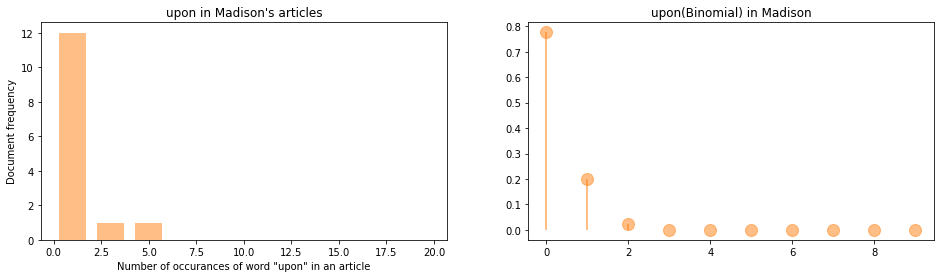

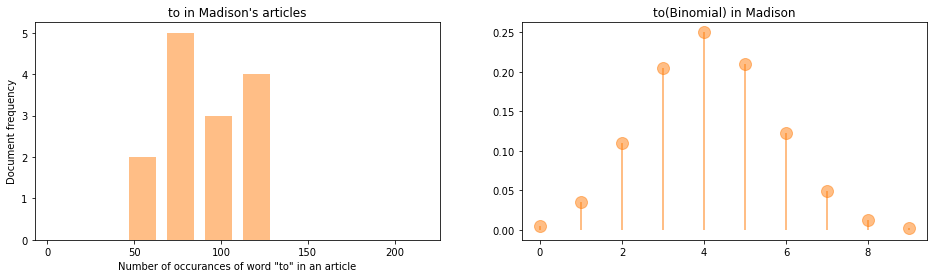

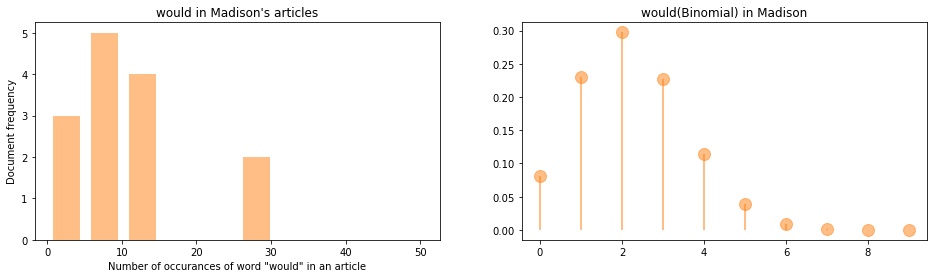

In [51]:
for word in ['upon','to', 'would']:
    
    maxwordcount = df_known[word].max()
    plt.figure(figsize=(16,4))
    plt.subplot(1, 2, 1)
    plt.hist(df_known[df_known['AUTHOR'] == 'Madison'][word], 
             rwidth=0.7,range=(0, maxwordcount), bins=10, color='tab:orange', alpha=0.5)
    plt.title("{} in Madison's articles".format(word))
    plt.xlabel('Number of occurances of word "{}" in an article'.format(word))
    plt.ylabel('Document frequency')
    total = df[df['AUTHOR'] == 'Madison'][word].sum()
    mean = df[df['AUTHOR'] == 'Madison'][word].mean()
    p = mean/ maxwordcount
    plt.subplot(1, 2, 2)
    n = 10
    x = np.arange(0, 10)
    plt.plot(x, binom.pmf(x, n, p), 'bo', ms=12, label='binom pmf', color='tab:orange', alpha=0.5)
    plt.title(label= "{}(Binomial) in Madison's articles".format(word), loc='center')
    plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=2, color='tab:orange', alpha=0.5)

    plt.show()

#### Q3. Represent with a histogram the article length. Does it make sense to view this distribution as a Gaussian?

#### Ans. Yes, as below plotted graph we can view the artical length distribution as a Gaussian

#### Extracting only word columns as below

In [53]:
print("Original Cols length         : {}".format(len(df.columns)))

all_word_cols = []
for col in df.columns:
    k= re.findall('[a-z]+', col,re.I)
    if k != []:
        all_word_cols.append(col)
print("Processed word tokens length : {}".format(len(all_word_cols)))

Original Cols length         : 11501
Processed word tokens length : 11275


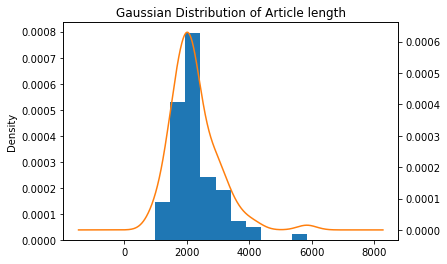

In [76]:
edited_rows = df[all_word_cols]
count_of_tokens = edited_rows.sum(axis=1)
count_of_tokens.plot(x= df, kind ='hist', density=True)
count_of_tokens.plot(kind='kde', secondary_y=True)
plt.title("Gaussian Distribution of Article length")
plt.show()

## Problem 2: Processing the text

#### Loading sms_spam.csv file


In [56]:
sms_text = pd.read_csv('corpus/sms_spam.csv', delimiter=",")
sms_text.head(5)

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


### Q1. Transform the text to lowercase

In [58]:
sms_text_lower = sms_text.copy()
sms_text_lower['text'] = sms_text_lower['text'].str.lower()
print("Length of tokens in sms_text['text'] : {}".format(len(sms_text_lower['text'])))
sms_text_lower.head(10)

Length of tokens in sms_text['text'] : 5559


,type,text
0,ham,hope you are having a good week. just checking in
1,ham,k..give back my thanks.
2,ham,am also doing in cbe only. but have to pay.
3,spam,"complimentary 4 star ibiza holiday or £10,000 ..."
4,spam,okmail: dear dave this is your final notice to...
5,ham,aiya we discuss later lar... pick u up at 4 is...
6,ham,are you this much buzy
7,ham,please ask mummy to call father
8,spam,marvel mobile play the official ultimate spide...
9,ham,"fyi i'm at usf now, swing by the room whenever"


### Q2. Normalize the tokens (replace the English contraction by their equivalent such ‘can’t’ -> ‘can not’)

In [59]:
contractions = {
"ain't": "aim not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": " she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as ",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": " we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": " who is",
"who've": "who have",
"why's": " why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

sms_text_lower_updated = sms_text_lower.copy()

contractions_array = []
for i, line in enumerate(sms_text_lower['text']):
    tokens_without_contractions = [contractions.get(word, word) for word in line.split(" ")]
    sms_text_lower_updated['text'][i] = (" ").join(tokens_without_contractions)
    
sms_text_lower_updated.head(20)


,type,text
0,ham,hope you are having a good week. just checking in
1,ham,k..give back my thanks.
2,ham,am also doing in cbe only. but have to pay.
3,spam,"complimentary 4 star ibiza holiday or £10,000 ..."
4,spam,okmail: dear dave this is your final notice to...
5,ham,aiya we discuss later lar... pick u up at 4 is...
6,ham,are you this much buzy
7,ham,please ask mummy to call father
8,spam,marvel mobile play the official ultimate spide...
9,ham,"fyi I am at usf now, swing by the room whenever"


### Q3. Be able to read a list of stopwords and to remove them when they appear in the text (two such lists are given in the folder ‘Corpus’).

#### First, we  remove special characters from a file


In [63]:
stop_words_1 = np.loadtxt('corpus/stopwords.txt', dtype='str')
sms_text_only_word_tokens = sms_text_lower_updated.copy()

for i,s in enumerate(sms_text_lower_updated['text']):
    only_word_tokens = re.findall("[a-z]+", s,re.I)
    sms_text_only_word_tokens['text'][i] =  (" ").join(only_word_tokens) 

sms_text_only_word_tokens.head(10)

,type,text
0,ham,hope you are having a good week just checking in
1,ham,k give back my thanks
2,ham,am also doing in cbe only but have to pay
3,spam,complimentary star ibiza holiday or cash needs...
4,spam,okmail dear dave this is your final notice to ...
5,ham,aiya we discuss later lar pick u up at is it
6,ham,are you this much buzy
7,ham,please ask mummy to call father
8,spam,marvel mobile play the official ultimate spide...
9,ham,fyi I am at usf now swing by the room whenever


##### Removing stop words from first stopword file


In [64]:
# Removing stop words from 2 files
sms_remove_stop_words = sms_text_only_word_tokens.copy()

for index,sms in enumerate(sms_text_only_word_tokens['text']):
    token_without_sw = [word for word in sms.split(" ") if not word in stop_words_1]
    sms_remove_stop_words['text'][index] = (" ").join(token_without_sw) 

    
sms_remove_stop_words.head(10)

,type,text
0,ham,hope good week checking
1,ham,k give back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday cash needs ur...
4,spam,okmail dear dave final notice collect tenerife...
5,ham,aiya discuss later lar pick u
6,ham,much buzy
7,ham,please ask mummy call father
8,spam,marvel mobile play official ultimate spider ma...
9,ham,fyi I usf swing room whenever


##### Removing stop words from second stopword file


In [65]:

stop_words_2 = np.loadtxt('corpus/StopwordSMART.txt', dtype='str')
sms_remove_stop_words_2 = sms_remove_stop_words.copy()

for index,sms in enumerate(sms_remove_stop_words['text']):
    token_without_sw = [word for word in sms.split(" ") if not word in stop_words_2]
    sms_remove_stop_words_2['text'][index] = (" ").join(token_without_sw) 

sms_remove_stop_words_2.head(10)

,type,text
0,ham,hope good week checking
1,ham,give back
2,ham,cbe pay
3,spam,complimentary star ibiza holiday cash urgent c...
4,spam,okmail dear dave final notice collect tenerife...
5,ham,aiya discuss lar pick
6,ham,buzy
7,ham,mummy call father
8,spam,marvel mobile play official ultimate spider ma...
9,ham,fyi I usf swing room


### Q4. Apply your preprocessing to both the spam and ham SMSs. Return the top 20 most frequent word-types for both categories

In [66]:
ham_tokens = sms_remove_stop_words_2.loc[sms_remove_stop_words_2['type'] == 'ham']
print("Total hams: ",len(ham_tokens))
spam_tokens = sms_remove_stop_words_2.loc[sms_remove_stop_words_2['type'] == 'spam']
print("Total Spams:",len(spam_tokens))

Total hams:  4812
Total Spams: 747


#### Top 20 most frequent word-types for "ham" categories 


In [73]:
words_all = []

for i, words in enumerate(ham_tokens['text']):
    total_words = words.split(" ")
    for w in total_words: 
        words_all.append(w)
        
words_dict = Counter(words_all)
dict_sorted = {k: v for k, v in sorted(words_dict.items(), key=lambda item: item[1], reverse=True)}
print("Top 20 word types in Ham: {} ".format(list(dict_sorted.keys())[:20]))


        

Top 20 word types in Ham: ['I', 'ur', 'call', 'good', 'day', 'love', 'time', 'home', 'lor', 'da', 'today', 'dont', 'back', 'send', 'pls', 'night', 'hope', 'dear', 'hey', 'happy'] 


#### Top 20 most frequent word-types for "Spam" categories 


In [74]:
# 20 most frequent word-types for "spam" categories
words_all_spam = []

for i, words_spam in enumerate(spam_tokens['text']):
    total_words = words_spam.split(" ")
    for w in total_words: 
        words_all_spam.append(w)
        
words_dict = Counter(words_all_spam)
dict_sorted = {k: v for k, v in sorted(words_dict.items(), key=lambda item: item[1], reverse=True)}
print("Top 20 word types in Spam: {} ".format(list(dict_sorted.keys())[:20]))


Top 20 word types in Spam: ['call', 'free', 'txt', 'ur', 'mobile', 'stop', 'text', 'claim', 'reply', 'www', 'prize', 'cash', 'uk', 'win', 'send', 'nokia', 'urgent', 'box', 'week', 'tone'] 
